In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import folium
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [2]:
def func(string):
    a_new_string =string.split('(')[0]
 
    return a_new_string

In [3]:
#read in data

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature'

In [79]:
df_list = pd.read_html(url, flavor='bs4')

In [81]:
#df_list

In [48]:
dfeurope= df_list[4]
dfeurope.drop('Ref.', axis=1, inplace=True)

In [49]:
for col in dfeurope.columns:
    dfeurope[col] = dfeurope[col].apply(func)

change name of krakow and sofiya

In [50]:
#dfeurope[dfeurope['City'] == 'Crakow'] = 'Krakow'
#dfeurope[dfeurope['City'] == 'Sofia'] = 'Sofiya'
dfeurope.replace('Sofia', 'Sofiya', inplace=True)
dfeurope.replace('Cracow', 'Krakow', inplace=True)

In [51]:
dfeurope

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Algeria,Algiers,11.2,11.9,12.8,14.7,17.7,21.3,24.6,25.2,23.2,19.4,15.2,12.1,17.4
1,Algeria,Tamanrasset,12.8,15.0,18.1,22.2,26.1,28.9,28.7,28.2,26.5,22.4,17.3,13.9,21.7
2,Algeria,Reggane,16.0,18.2,23.1,27.9,32.2,36.4,39.8,38.4,35.5,29.2,22.0,17.8,28.3
3,Angola,Luanda,26.7,28.5,28.6,28.2,27.0,23.9,22.1,22.1,23.5,25.2,26.7,26.9,25.8
4,Benin,Cotonou,27.3,28.5,28.9,28.6,27.8,26.5,25.8,25.6,26.0,26.7,27.6,27.3,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Zambia,Ndola,20.8,20.8,21.0,20.5,18.6,16.5,16.7,19.2,22.5,23.7,22.5,21.0,20.3
105,Zambia,Lusaka,21.5,21.5,21.1,19.9,17.4,15.2,14.9,17.3,21.3,23.5,23.4,21.7,19.9
106,Zambia,Livingstone,23.6,23.2,23.1,21.9,18.9,16.0,16.1,19.3,23.9,26.2,25.1,23.6,21.8
107,Zimbabwe,Harare,21.0,20.7,20.3,18.8,16.1,13.7,13.4,15.5,18.6,20.8,21.2,20.9,18.4


In [52]:
##get coordinates of each city

In [53]:
geolocator = Nominatim(user_agent="test")
cities = dfeurope['City']

In [54]:
locations = []
for c in cities:
    locations.append(geolocator.geocode(c))

In [55]:
latitudes = [x[0] for x in [x[1] for x in locations]]
longitudes = [x[1] for x in [x[1] for x in locations]]

In [56]:
dfeurope['Lat'] = latitudes

In [57]:
dfeurope['Long'] = longitudes

In [58]:
dfeurope.drop('Year', axis=1, inplace=True)

In [59]:
dfeurope

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lat,Long
0,Algeria,Algiers,11.2,11.9,12.8,14.7,17.7,21.3,24.6,25.2,23.2,19.4,15.2,12.1,28.000027,2.999983
1,Algeria,Tamanrasset,12.8,15.0,18.1,22.2,26.1,28.9,28.7,28.2,26.5,22.4,17.3,13.9,24.375344,4.320844
2,Algeria,Reggane,16.0,18.2,23.1,27.9,32.2,36.4,39.8,38.4,35.5,29.2,22.0,17.8,26.720727,0.175151
3,Angola,Luanda,26.7,28.5,28.6,28.2,27.0,23.9,22.1,22.1,23.5,25.2,26.7,26.9,-8.827270,13.243951
4,Benin,Cotonou,27.3,28.5,28.9,28.6,27.8,26.5,25.8,25.6,26.0,26.7,27.6,27.3,6.367695,2.425251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Zambia,Ndola,20.8,20.8,21.0,20.5,18.6,16.5,16.7,19.2,22.5,23.7,22.5,21.0,-12.969306,28.636589
105,Zambia,Lusaka,21.5,21.5,21.1,19.9,17.4,15.2,14.9,17.3,21.3,23.5,23.4,21.7,-15.416449,28.282153
106,Zambia,Livingstone,23.6,23.2,23.1,21.9,18.9,16.0,16.1,19.3,23.9,26.2,25.1,23.6,-22.721138,150.241276
107,Zimbabwe,Harare,21.0,20.7,20.3,18.8,16.1,13.7,13.4,15.5,18.6,20.8,21.2,20.9,-17.831773,31.045686


In [60]:
#dfeurope[dfeurope['City'].str.contains('Sofiya')]

In [61]:
dfeu_cities = dfeurope.drop('Country', axis=1)

In [62]:
dfeu_cities

,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Lat,Long
0,Algiers,11.2,11.9,12.8,14.7,17.7,21.3,24.6,25.2,23.2,19.4,15.2,12.1,28.000027,2.999983
1,Tamanrasset,12.8,15.0,18.1,22.2,26.1,28.9,28.7,28.2,26.5,22.4,17.3,13.9,24.375344,4.320844
2,Reggane,16.0,18.2,23.1,27.9,32.2,36.4,39.8,38.4,35.5,29.2,22.0,17.8,26.720727,0.175151
3,Luanda,26.7,28.5,28.6,28.2,27.0,23.9,22.1,22.1,23.5,25.2,26.7,26.9,-8.827270,13.243951
4,Cotonou,27.3,28.5,28.9,28.6,27.8,26.5,25.8,25.6,26.0,26.7,27.6,27.3,6.367695,2.425251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Ndola,20.8,20.8,21.0,20.5,18.6,16.5,16.7,19.2,22.5,23.7,22.5,21.0,-12.969306,28.636589
105,Lusaka,21.5,21.5,21.1,19.9,17.4,15.2,14.9,17.3,21.3,23.5,23.4,21.7,-15.416449,28.282153
106,Livingstone,23.6,23.2,23.1,21.9,18.9,16.0,16.1,19.3,23.9,26.2,25.1,23.6,-22.721138,150.241276
107,Harare,21.0,20.7,20.3,18.8,16.1,13.7,13.4,15.5,18.6,20.8,21.2,20.9,-17.831773,31.045686


In [63]:
#format dataframe
dfeu_cities.replace('−','-',regex=True, inplace = True)
for col in dfeu_cities.columns:
    if col == 'City':
        pass
    else:
        dfeu_cities[col] = pd.to_numeric(dfeu_cities[col],errors='coerce')

In [64]:
temp_check = dfeurope.drop(['City','Country','Lat','Long'], axis=1)

In [65]:
temp_check.replace('−','-',regex=True, inplace = True)
temp_check = temp_check.astype('Float32')

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Temperatures in Degrees ºC')]

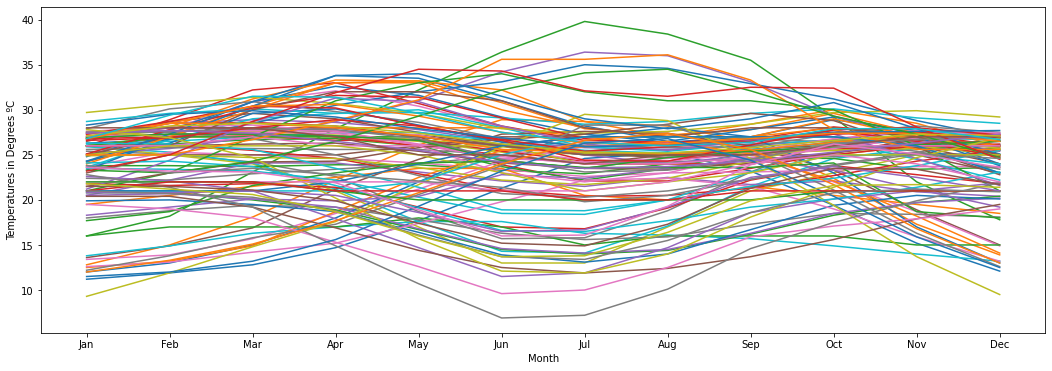

In [66]:
f, ax = plt.subplots(figsize=(18, 6))
plt.plot(temp_check.T)
ax.set(xlabel='Month', ylabel='Temperatures in Degrees ºC')

Find the best k 

In [67]:
from sklearn.metrics import silhouette_score

grouped_clustering = dfeu_cities.drop('City', 1)
#grouped_clustering = temp_check
#grouped_clustering.replace('−','-',regex=True, inplace = True)
#grouped_clustering.astype('Float32').dtypes

sil = []
kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(grouped_clustering, labels, metric = 'euclidean'))

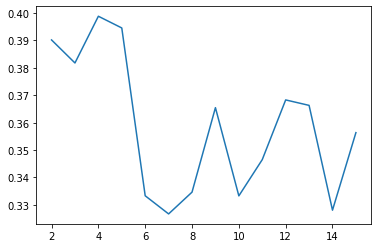

In [68]:
plt.plot(range(2, kmax+1), sil)

In [69]:
# set number of clusters
kclusters = 5

grouped_clustering = dfeu_cities.drop('City', 1)
#grouped_clustering = temp_check
#grouped_clustering.replace('−','-',regex=True, inplace = True)
#grouped_clustering.astype('Float32').dtypes

# run k-means clustering
kmeans =KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 4, 4, 4, 0, 2, 1, 1], dtype=int32)

In [70]:
grouped_clustering.insert(0, 'Cluster_Labels', kmeans.labels_)

In [71]:
#latitude = dfeu_cities.Lat[0]
#longitude = dfeu_cities.Long[0]

In [72]:
latitude = grouped_clustering.Lat[0]
longitude = grouped_clustering.Long[0]

In [73]:
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
#for lat, lon, poi, cluster in zip(dfeu_cities['Lat'], dfeu_cities['Long'], dfeu_cities['City'], grouped_clustering['Cluster_Labels']):
for lat, lon, poi, cluster in zip(grouped_clustering['Lat'], grouped_clustering['Long'], dfeu_cities['City'], grouped_clustering['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

![European Climates](http://2.bp.blogspot.com/-4dgHhmOxKXY/UTZAN40tCjI/AAAAAAAABAQ/fGKksN_pHU0/s1600/European+climates.PNG)

In [74]:
grouped_clustering.drop(['Lat', 'Long'], axis =1 , inplace=True)

In [75]:
grouped_clustering.groupby('Cluster_Labels').mean()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Cluster_Labels,,,,,,,,,,,,
0,25.430000,26.250000,27.455000,28.065000,28.135000,27.870000,27.255000,27.345000,27.385000,27.230000,26.250000,25.430000
1,22.214286,22.128571,21.653571,20.178571,18.157143,16.117857,15.735714,17.153571,19.467857,21.057143,21.746429,21.896429
2,15.050000,16.393750,18.381250,20.612500,22.850000,25.037500,26.450000,26.718750,25.656250,23.006250,19.125000,15.931250
3,23.600000,23.200000,23.100000,21.900000,18.900000,16.000000,16.100000,19.300000,23.900000,26.200000,25.100000,23.600000
4,25.306818,26.620455,27.725000,28.150000,27.770455,26.593182,25.425000,25.311364,25.915909,26.713636,26.400000,25.313636


In [76]:
transposed_gr = grouped_clustering.groupby('Cluster_Labels').mean().T


Avg temp per Cluster 

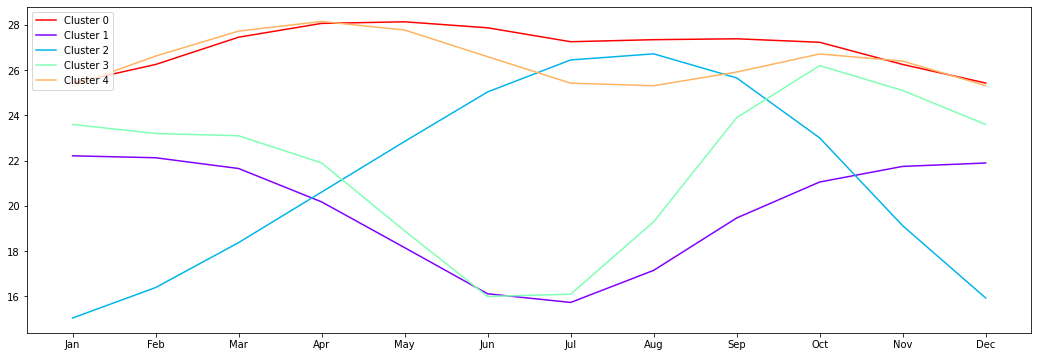

In [77]:
f, ax = plt.subplots(figsize=(18, 6))
for i in range(0,transposed_gr.shape[1]):
    plt.plot(transposed_gr.index,transposed_gr[i], label='Cluster {}'.format(i), color = rainbow[i-1])
    
ax.legend(loc='upper left')

Avg temp per city colored per cluster

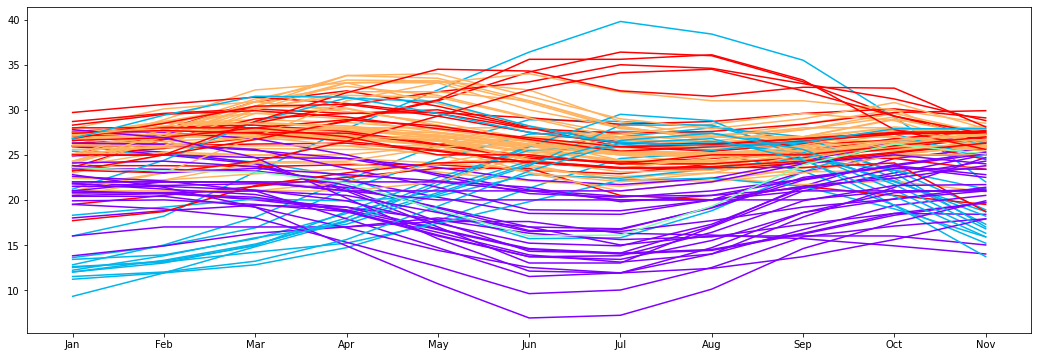

In [78]:
f, ax = plt.subplots(figsize=(18, 6))

for i in range(0,grouped_clustering.T.shape[1]):
    plt.plot(grouped_clustering.T.index[1:-1],grouped_clustering.T[i][1:-1], color = rainbow[int(grouped_clustering.T[i][0]-1)])
   

In [44]:
transposed_gr.describe()

Cluster_Labels,0,1,2,3,4
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,24.654412,12.350439,25.800260,-0.941667,13.827941
std,5.444209,8.943133,1.746492,14.462614,9.171824
min,16.600000,-0.584211,22.812500,-20.800000,0.976471
25%,20.432353,5.057895,24.592969,-12.921429,6.402941
50%,25.450000,13.086842,26.562500,0.250000,14.126471
75%,29.376471,20.214474,27.259375,10.867857,21.691176
max,31.141176,23.994737,27.478125,17.857143,26.258824


<AxesSubplot:>

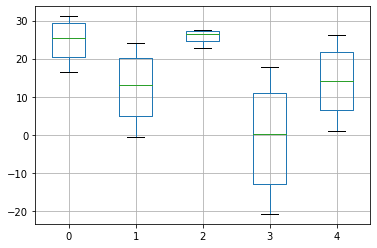

In [45]:
transposed_gr.boxplot()

In [46]:
import seaborn as sns

<AxesSubplot:xlabel='Cluster_Labels'>

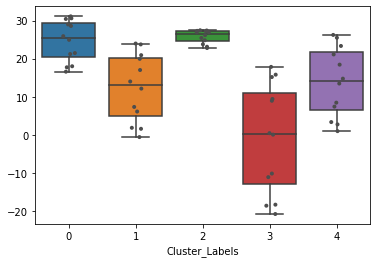

In [47]:
sns.boxplot(data=transposed_gr)
sns.stripplot(data=transposed_gr,
              size=4, color=".3", linewidth=0)

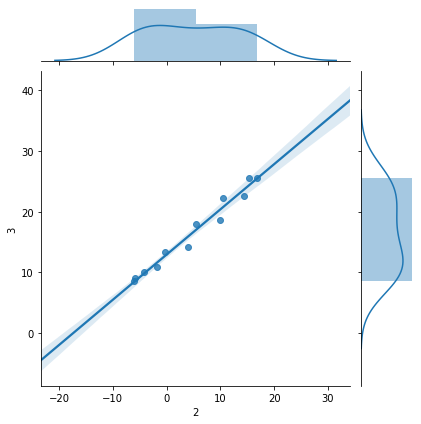

In [195]:
sns.jointplot(x=2, y=3, kind="reg", truncate=False, data=transposed_gr)

<AxesSubplot:xlabel='Cluster_Labels'>

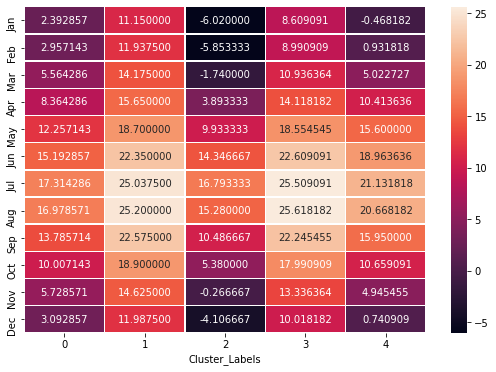

In [203]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(transposed_gr, annot=True, fmt="f", linewidths=.5, ax=ax)

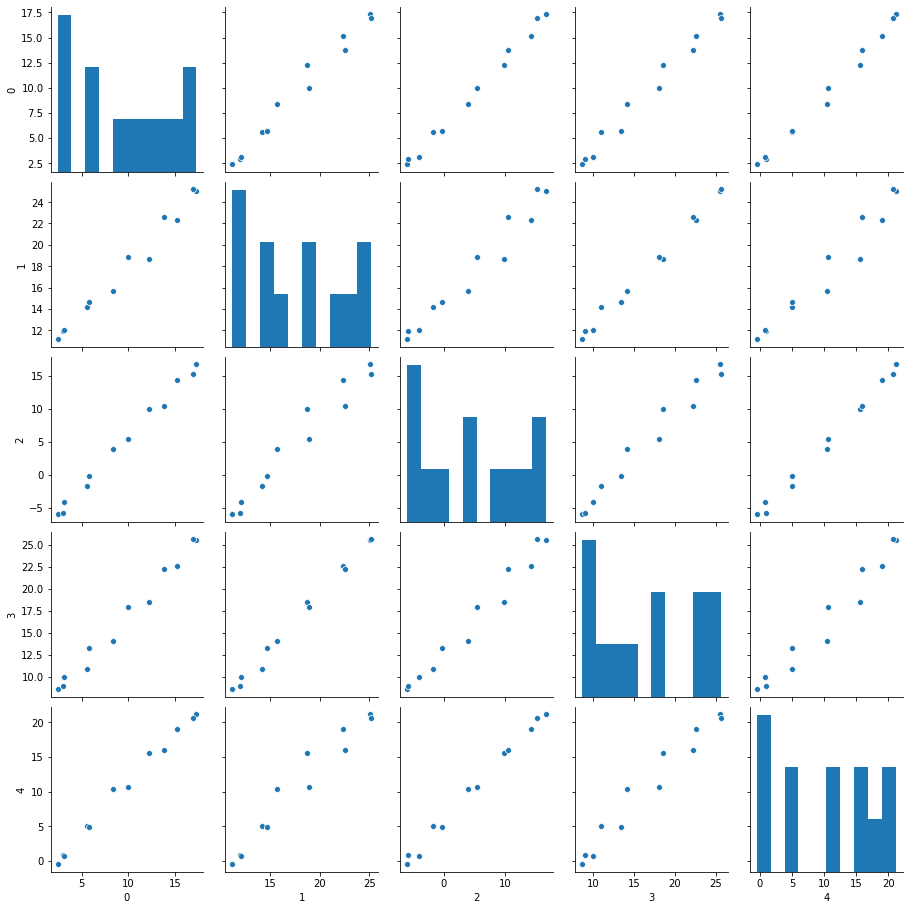

In [215]:

sns.pairplot(transposed_gr)

In [211]:
transposed_gr

Cluster_Labels,0,1,2,3,4
Jan,2.392857,11.1500,-6.020000,8.609091,-0.468182
Feb,2.957143,11.9375,-5.853333,8.990909,0.931818
Mar,5.564286,14.1750,-1.740000,10.936364,5.022727
Apr,8.364286,15.6500,3.893333,14.118182,10.413636
May,12.257143,18.7000,9.933333,18.554545,15.600000
Jun,15.192857,22.3500,14.346667,22.609091,18.963636
Jul,17.314286,25.0375,16.793333,25.509091,21.131818
Aug,16.978571,25.2000,15.280000,25.618182,20.668182
Sep,13.785714,22.5750,10.486667,22.245455,15.950000
Oct,10.007143,18.9000,5.380000,17.990909,10.659091


In [148]:
grouped_clustering.T[0][0]-1

0.0

In [145]:
grouped_clustering.T[0][0]

1.0

In [151]:
grouped_clustering.T[0][0]-1

0.0

In [160]:
for i in range(0,grouped_clustering.T.shape[1]):
    print(int(grouped_clustering.T[i][0]))
    print(int(grouped_clustering.T[i][0]-1))
    print(rainbow[int(grouped_clustering.T[i][0]-1)])

1
0
#8000ff
4
3
#b2f396
0
-1
#ff0000
5
4
#ff964f
4
3
#b2f396
0
-1
#ff0000
0
-1
#ff0000
0
-1
#ff0000
1
0
#8000ff
3
2
#4df3ce
5
4
#ff964f
4
3
#b2f396
5
4
#ff964f
5
4
#ff964f
2
1
#1996f3
2
1
#1996f3
1
0
#8000ff
0
-1
#ff0000
0
-1
#ff0000
0
-1
#ff0000
3
2
#4df3ce
0
-1
#ff0000
5
4
#ff964f
4
3
#b2f396
0
-1
#ff0000
3
2
#4df3ce
1
0
#8000ff
1
0
#8000ff
5
4
#ff964f
0
-1
#ff0000
5
4
#ff964f
4
3
#b2f396
0
-1
#ff0000
3
2
#4df3ce
0
-1
#ff0000
1
0
#8000ff
1
0
#8000ff
4
3
#b2f396
4
3
#b2f396
5
4
#ff964f
2
1
#1996f3
0
-1
#ff0000
5
4
#ff964f
5
4
#ff964f
0
-1
#ff0000
3
2
#4df3ce
0
-1
#ff0000
2
1
#1996f3
5
4
#ff964f
2
1
#1996f3
0
-1
#ff0000
5
4
#ff964f
1
0
#8000ff
0
-1
#ff0000
0
-1
#ff0000
0
-1
#ff0000
0
-1
#ff0000
3
2
#4df3ce
3
2
#4df3ce
1
0
#8000ff
3
2
#4df3ce
3
2
#4df3ce
5
4
#ff964f
4
3
#b2f396
1
0
#8000ff
5
4
#ff964f
5
4
#ff964f
0
-1
#ff0000
4
3
#b2f396
4
3
#b2f396


In [159]:
grouped_clustering.T[1]

Cluster_Labels     4.000000
Jan                2.200000
Feb                3.500000
Mar                5.800000
Apr                7.500000
May               11.500000
Jun               15.400000
Jul               18.799999
Aug               18.500000
Sep               14.900000
Oct               10.300000
Nov                5.700000
Dec                3.000000
Name: 1, dtype: float64

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Temperatures in Degrees ºC')]

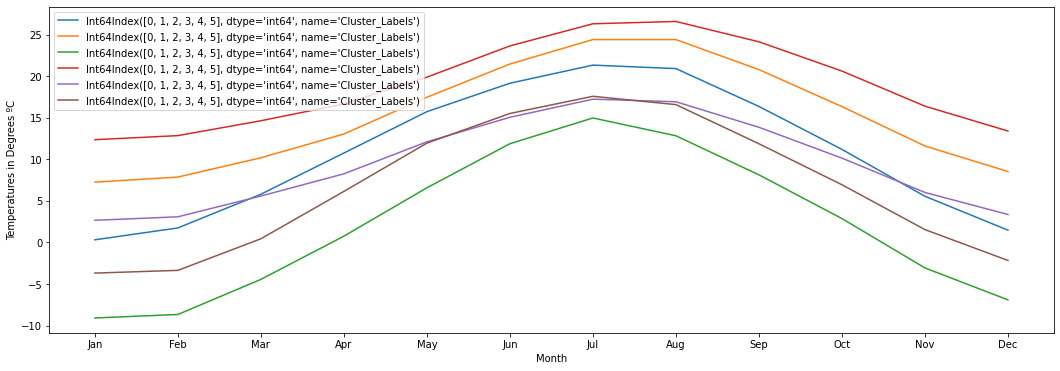

In [74]:
f, ax = plt.subplots(figsize=(18, 6))
gp = grouped_clustering.groupby('Cluster_Labels')

gp = gp.apply(lambda x: x.name)

plt.plot(grouped_clustering.groupby('Cluster_Labels').mean().T, label=grouped_clustering.groupby('Cluster_Labels').mean().T.columns)
ax.legend(loc='upper left')
ax.set(xlabel='Month', ylabel='Temperatures in Degrees ºC')

In [52]:
grouped_clustering.groupby('Cluster_Labels').groups.keys()[

dict_keys([0, 1, 2, 3, 4, 5])

In [58]:
gp = grouped_clustering.groupby('Cluster_Labels')

gp = gp.apply(lambda x: x.name)

In [65]:
gp.values

array([0, 1, 2, 3, 4, 5])

In [77]:
trdf = grouped_clustering.groupby('Cluster_Labels').mean().T

In [86]:
trdf

Cluster_Labels,0,1,2,3,4,5
Jan,0.323810,7.260000,-9.080000,12.366667,2.67,-3.680000
Feb,1.752381,7.870000,-8.660000,12.855556,3.09,-3.353333
Mar,5.804762,10.190001,-4.440000,14.644444,5.59,0.446667
Apr,10.761905,13.050000,0.760000,16.666666,8.26,6.146667
May,15.738095,17.469999,6.580000,19.888889,12.11,11.953333
Jun,19.157143,21.469999,11.880000,23.644444,15.06,15.520000
Jul,21.338095,24.410000,14.980000,26.311111,17.24,17.586666
Aug,20.919048,24.410000,12.840000,26.588888,16.93,16.586666
Sep,16.366667,20.799999,8.139999,24.144445,13.86,11.880000
Oct,11.200000,16.350000,2.880000,20.622223,10.15,6.946667


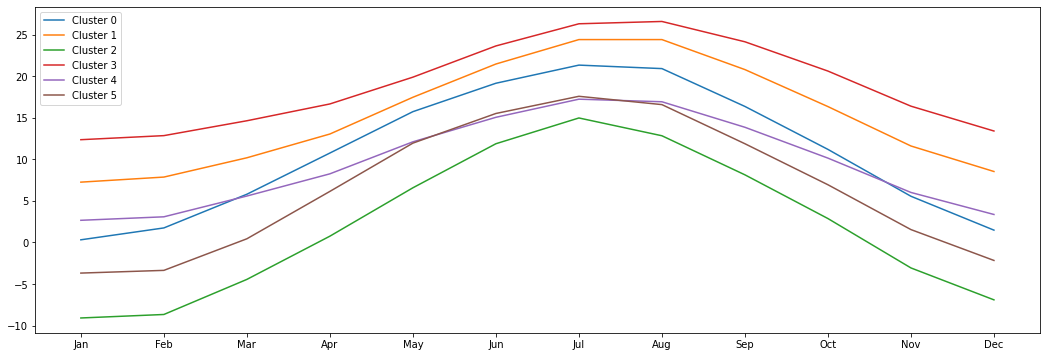

In [98]:
f, ax = plt.subplots(figsize=(18, 6))
for i in range(0,trdf.shape[1]):
    plt.plot(trdf.index,trdf[i], label='Cluster {}'.format(i))
    
ax.legend(loc='upper left')

In [90]:
trdf

Cluster_Labels,0,1,2,3,4,5
Jan,0.323810,7.260000,-9.080000,12.366667,2.67,-3.680000
Feb,1.752381,7.870000,-8.660000,12.855556,3.09,-3.353333
Mar,5.804762,10.190001,-4.440000,14.644444,5.59,0.446667
Apr,10.761905,13.050000,0.760000,16.666666,8.26,6.146667
May,15.738095,17.469999,6.580000,19.888889,12.11,11.953333
Jun,19.157143,21.469999,11.880000,23.644444,15.06,15.520000
Jul,21.338095,24.410000,14.980000,26.311111,17.24,17.586666
Aug,20.919048,24.410000,12.840000,26.588888,16.93,16.586666
Sep,16.366667,20.799999,8.139999,24.144445,13.86,11.880000
Oct,11.200000,16.350000,2.880000,20.622223,10.15,6.946667


In [ ]:
grouped_clustering = grouped_clustering.astype('Float32')

In [ ]:
dfeu_cities.replace('−','-',regex=True, inplace = True)

In [ ]:
for col in dfeu_cities.columns:
    if col == 'City':
        pass
    else:
        dfeu_cities[col] = pd.to_numeric(dfeu_cities[col],errors='coerce')

In [ ]:
dfeu_cities['Jan'] = pd.to_numeric(dfeu_cities['Jan'],errors='coerce')

In [ ]:
dfeu_cities.dtypes

In [ ]:
fo

find best k in kmeans by looking at Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(grouped_clustering, labels, metric = 'euclidean'))

In [ ]:
len(sil)

In [ ]:
plt.plot(range(2, kmax+1), sil)


In [ ]:
np.argmax(sil, axis=0)

In [ ]:
grouped_clustering

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
distortions = []
K = range(2,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(grouped_clustering)
    distortions.append(kmeanModel.inertia_)

In [ ]:
plt.plot(range(2,30), distortions)

In [ ]:
plt.plot(range(2,30), distortions)
plt.plot(range(2, kmax+1), sil)

In [ ]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [ ]:
calculate_WSS(grouped_clustering,30)

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

Clus_dataSet = grouped_clustering[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Lat','Long']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=3).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
grouped_clustering["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

In [ ]:
grouped_clustering

In [ ]:
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(grouped_clustering['Lat'], grouped_clustering['Long'], dfeu_cities['City'], grouped_clustering['Clus_Db']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
grouped_clustering.groupby('Clus_Db').mean()

In [ ]:
geolocator.geocode('Sofiya')